# PROYECTO INDIVIDUAL 2 - DATA ANALYTYCS

## JOAQUIN MILLAN LANHOZO

### SOY HENRY

# PARTE 2 - EDA

In [1]:
# Importo librerias

import pandas as pd
import datetime as dt
import time as t
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import requests
from datetime import datetime, timedelta
import yfinance as yf
import datetime
import seaborn as sns
import plotly.express as px

In [2]:
# Creo la instancia

cg = CoinGeckoAPI()

In [3]:
# Check de conexion

cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [4]:
# Seteo de numeros sin exponenciales "e+11"

pd.options.display.float_format = '{:.0f}'.format

In [5]:
# Lectura del dataset creado en la otra notebook

df = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA\GITHUB/dataset_final.csv")
df.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
0,1019,16387926825,4444828109,999,1031,997,1022,BTC,2017-01-02
1,1036,16652715383,4399421327,1022,1044,1022,1044,BTC,2017-01-03
2,1131,18187664240,8705359110,1044,1159,1044,1155,BTC,2017-01-04
3,991,15934886737,12102750397,1157,1191,910,1013,BTC,2017-01-05
4,894,14382278477,10713248032,1014,1047,884,902,BTC,2017-01-06


In [6]:
# Miro la cantidad de filas y columnas

df.shape

(20234, 9)

In [7]:
# Miro los tipos de datos y nulos que tenga mi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20234 entries, 0 to 20233
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        20234 non-null  float64
 1   Market_cap   20234 non-null  float64
 2   Volume_x     20234 non-null  float64
 3   Open         20234 non-null  float64
 4   High         20234 non-null  float64
 5   Low          20234 non-null  float64
 6   Close        20234 non-null  float64
 7   Moneda       20234 non-null  object 
 8   date_column  20234 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


In [8]:
# No hay valores nulos

df.isnull().sum()

Price          0
Market_cap     0
Volume_x       0
Open           0
High           0
Low            0
Close          0
Moneda         0
date_column    0
dtype: int64

In [9]:
# Tampoco hay datos duplicados

df.duplicated().sum()

0

## BTC - Bitcoin

Bitcoin (BTC) es la criptomoneda más antigua de todas y nació en el año 2009 de la mano de Satoshi Nakamoto, una persona o grupo de personas de quien se desconoce la identidad, que describió a este tipo de moneda virtual como "un sistema de dinero electrónico de igual a igual", tal y como se bautiza en el documento fundacional de Bitcoin.

Así, se presenta por primera vez el concepto de Bitcoin al mundo, lo que marca el nacimiento de las criptomonedas. El 3 de enero de 2009 se llevó a cabo su nacimiento oficial cuando el primer Bitcoin.  

El proceso de generación de nuevos Bitcoins se llama "minería." Los mineros utilizan poderosas computadoras para resolver complejas operaciones matemáticas que validan y registran las transacciones en la red Bitcoin. A medida que los mineros resuelven estos problemas, se agregan nuevos bloques a la cadena de bloques (blockchain) y se emiten nuevas monedas Bitcoin como recompensa por su trabajo. Inicialmente, la recompensa por bloque era de 50 Bitcoins. Sin embargo, este número se reduce a la mitad en un evento conocido como el "halving."


El halving de Bitcoin es un evento programado que ocurre aproximadamente cada cuatro años. En este evento, la recompensa que los mineros reciben por resolver un bloque se reduce a la mitad. El primer halving ocurrió en noviembre de 2012, reduciendo la recompensa de 50 a 25 Bitcoins por bloque. El segundo halving tuvo lugar en julio de 2016, reduciendo la recompensa a 12.5 Bitcoins por bloque. El tercer halving ocurrió en mayo de 2020, reduciendo la recompensa a 6.25 Bitcoins por bloque.


La cantidad total de Bitcoins que se generarán es limitada a 21 millones. Este límite está diseñado para imitar la escasez de recursos naturales y evitar la inflación en la oferta de Bitcoins. A medida que se emiten nuevos Bitcoins a través del proceso de minería, la cantidad de recompensa por bloque se reduce a la mitad en cada evento de halving.


Dado que cada bloque se mina en promedio cada 10 minutos, y el halving ocurre aproximadamente cada cuatro años, se espera que todos los Bitcoins se hayan extraído cerca del año 2140. Sin embargo, es importante tener en cuenta que la minería y la red Bitcoin están sujetas a cambios y ajustes a lo largo del tiempo, lo que podría afectar ligeramente estos plazos.


Si bien el BTC, es la moneda mas antigua de todas y al principio su valor era menor a los que actualmente tiene y supo tener, decidi tomar como las otras monedas elegidas y explicadas anteriormente desde el 2017, que es cuando considero que las criptomonedas tuvieron un auge y crecimiento exponencial. 



In [10]:
# Filtro dataset con la moneda en cuestion a analizar

df_btc = df[df["Moneda"]== "BTC"]
df_btc.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
0,1019,16387926825,4444828109,999,1031,997,1022,BTC,2017-01-02
1,1036,16652715383,4399421327,1022,1044,1022,1044,BTC,2017-01-03
2,1131,18187664240,8705359110,1044,1159,1044,1155,BTC,2017-01-04
3,991,15934886737,12102750397,1157,1191,910,1013,BTC,2017-01-05
4,894,14382278477,10713248032,1014,1047,884,902,BTC,2017-01-06


In [11]:
# Vista de variables numericas de este dataframe

df_btc.describe()

# No dice mucho, ya que es muy volatil y exponencial. Aunque aqui se puede ver  los maximos a los que ha llegaodo la moneda

,Price,Market_cap,Volume_x,Open,High,Low,Close
count,2422,2422,2422,2422,2422,2422,2422
mean,18509,345215157273,21637068756,18497,18941,18009,18506
std,16177,308253877190,19107535852,16160,16561,15696,16153
min,784,12624083565,20288321,775,823,756,778
25%,6637,114838764361,4092124471,6639,6776,6537,6641
50%,10665,189675986794,19957031871,10665,10932,10362,10686
75%,28512,548621200065,31700272627,28460,29096,27914,28447
max,67617,1278797895528,178894068361,67550,68790,66382,67567


In [12]:
# Defino una funcion para poder ver la evolucion del precio, a traves del correr de los años, para poder ver la grafica y realizar
# analisis pertinente moneda tras moneda. Hago una funcion para que luego sea mas eficiente correr la funcion con el resto de las monedas

def evolucion_precio(moneda):
    # Filtro del dataframe por la moneda que se le de de input
    moneda_df = df[df["Moneda"] == moneda]
    moneda_df = moneda_df[["Price", "date_column"]]
    moneda_df["Price"] = round(moneda_df["Price"], 2)

    # Utilizo la libreria plotly que tiene graficos interactivos
    fig = px.line(moneda_df, x='date_column', y="Price", title=f'Evolucion del precio {moneda}')

    max_price = moneda_df["Price"].max()  # Precio Maximo
    max_date = moneda_df.loc[moneda_df["Price"].idxmax(), "date_column"]  # Busco la fecha del precio maximo
    
    # Agrego linea roja para ver el pico historico de cada moneda
    fig.add_trace(go.Scatter(x=[max_date], y=[max_price], mode='markers', marker=dict(color='red', size=10),
                             name=f'Max Price of {moneda}')) 
    fig.add_shape(type="line", x0=moneda_df['date_column'].iloc[0], x1=moneda_df['date_column'].iloc[-1],
                  y0=max_price, y1=max_price, line=dict(color="red", width=2, dash="dash"))
    fig.add_annotation(x=max_date, y=max_price,
                       text=f"The max price of {moneda} is {max_price:.2f}",
                       showarrow=True, arrowhead=2, arrowcolor='red', ax=0, ay=-40)
    
    # Ahora replico lo mismo pero para el minimo de la moneda, en verde
    min_price = moneda_df["Price"].min()  # Precio minimo
    min_date = moneda_df.loc[moneda_df["Price"].idxmin(), "date_column"]  # Fecha precio minimo   


    fig.add_trace(go.Scatter(x=[min_date], y=[min_price], mode='markers', marker=dict(color='green', size=10),
                             name=f'Min Price of {moneda}'))
    fig.add_shape(type="line", x0=moneda_df['date_column'].iloc[0], x1=moneda_df['date_column'].iloc[-1],
                  y0=min_price, y1=min_price, line=dict(color="green", width=2, dash="dash"))

    # Titulos y ejes
    fig.add_annotation(x=min_date, y=min_price,
                       text=f"The Min price of {moneda} is {min_price:.2f}",
                       showarrow=True, arrowhead=2, arrowcolor='green', ax=0, ay=-40) 

    fig.update_xaxes(title_text='Fecha')
    fig.update_yaxes(title_text='Precio')
    fig.show()



In [13]:
evolucion_precio("BTC")

El BTC - Bitcoin es la criptomoneda mas popular, y con el boom de las criptomonedas, su crecimiento fue exponencial. Como muestra el grafico, su punto mas bajo es en el 2017 y desde alli fue creciendo con sus altos y bajos (este es el punto mas bajo, porque recordemos que por cuestiones de eficiencia y memoria, este dataset es desde el 2017 a la actualidad).

- A finales de 2017, el precio del Bitcoin experimentó un aumento significativo en su valor, que a menudo se denomina "rally alcista" o "burbuja de precios.  Hubo mucho incremento en el conocimiento y popularidad del bitcoin, de su tecnologia detras y de la descentralizacion que involucra este nuevo mercado de criptomonedas. Habia expectativas de crecimiento futuro, por el cual muchos inversionistas creían que el Bitcoin y las criptomonedas en general tenían el potencial de cambiar la forma en que operaba el sistema financiero, lo que llevó a expectativas de un crecimiento significativo en el futuro. Otro factor, fue la conocida sigla FOMO (Fear Of Missing Out), que es el temor a perderse oportunidades de inversión, lo cual llevó a más personas a invertir en el Bitcoin antes de que su precio subiera aún más, lo que creó un ciclo de demanda adicional (lo que genero que el mercado creciera en precio por el principio de oferta y demanda). Mientras el tiempo pasaba, más exchanges de criptomonedas se establecieron, lo que facilitó el comercio y aumentó la liquidez del mercado. Tras este conocimiento, el Bitcoin tiene una oferta limitada establecida en 21 millones de monedas en total, lo que crea una sensacion de escasez que puede impulsar la demanda y, en consecuencia, el precio. 

- A finales de 2020, el precio del Bitcoin experimentó un aumento exponencial en su valor. Hubo un aumento significativo en la adopción institucional de Bitcoin. Grandes empresas, fondos de inversión y gestores de activos comenzaron a mostrar interés en Bitcoin como una reserva de valor y cobertura contra la inflación. La participación de actores institucionales agregó legitimidad y confianza al mercado de criptomonedas. En mayo de 2020, se produjo el tercer evento de reducción a la mitad de Bitcoin, conocido como "halving". Durante este evento, las recompensas de minería se redujeron a la mitad, lo que limitó aún más la oferta de nuevos Bitcoins. La reducción en la tasa de creación de nuevas monedas contribuyó a una percepción de escasez y aumentó el interés de los inversores. La incertidumbre económica global y las políticas de flexibilización cuantitativa implementadas en respuesta a la pandemia de COVID-19 generaron preocupaciones sobre la inflación y la depreciación de las monedas fiduciarias. En este contexto, algunos inversores vieron a Bitcoin como un activo refugio seguro y una protección contra la devaluación del dinero. Nuevamente, el aumento de precios en sí mismo generó un sentido de euforia y FOMO (Fear of Missing Out), lo que llevó a más inversores a entrar al mercado en un intento de obtener ganancias rápidas.

- El precio del Bitcoin experimentó una caída significativa en mayo de 2021, y esta caída estuvo influenciada por varios factores clave: China intensificó sus medidas regulatorias contra las criptomonedas. El gobierno chino anunció restricciones más estrictas sobre la minería de criptomonedas y el comercio de criptomonedas en el país. Dado que China era uno de los mayores centros de minería de Bitcoin y tenía una gran base de usuarios de criptomonedas, estas medidas crearon incertidumbre en el mercado y afectaron la demanda. Las declaraciones de funcionarios gubernamentales y reguladores sobre la necesidad de regular más estrictamente las criptomonedas contribuyeron a la volatilidad del mercado. El mercado estaba en un estado de sobrecompra y algunos inversores optaron por realizar ganancias al vender sus tenencias, lo que desencadenó una presión de venta. La caída del mercado provocó una liquidación masiva de posiciones largas en las bolsas de criptomonedas, esto resultó en una disminución adicional de los precios y llevó a una pérdida de confianza en el mercado.  Las preocupaciones sobre el consumo energético de la minería de criptomonedas y su impacto ambiental también influyeron en el sentimiento del mercado. Las críticas a la sostenibilidad de Bitcoin y otras criptomonedas contribuyeron a la volatilidad.

- En Julio 2021, el precio del Bitcoin vuelve a crecer exponencialmente hasta tocar su pico en Noviembre del 2021. En algunos países y jurisdicciones, Bitcoin fue reconocido como una moneda legal o recibió algún tipo de estatus legal. Esto aumentó la percepción de legitimidad de Bitcoin como activo y moneda digital. La cobertura mediática positiva, así como la adopción generalizada de Bitcoin en diversos sectores (como pagos, finanzas, tecnología, entre otros), aumentaron la percepción pública y la demanda.

- Tras tocar su pico en Noviembre de 2021, sufrio una gran caida que en cierta forma y uno de los factores asociados, pueden ser entre otras, que la caída del bitcoin está vinculado con la creciente tasa de inflación de los Estados Unidos y la decisión de la Reserva Federal de ese país de subir la tasa de interés, lo cual lleva a inversores a modificar y destinar sus fondos a otras inversiones.

- Tras su pico y hasta hoy en dia (Agosto 2023), el precio volvio a bajar y como bien podemos ver a lo largo de todo el grafico, el mercado de las criptomonedas es muy volatil y es un mercado activo 24/7, sin parar, en donde determinadas acciones economicas de paises o acontecimientos pueden contribuir a la alza y baja en el mercado. Pero tal y como se puede ver, y aun hasta antes de lo que muestra el grafico, el precio va creciendo en cuanto a sus escalones y pisos de precio. Si bien tiene riesgo y es muy volatil, a largo plazo se ve un incremento en su valor, si bien no se sabe que va a pasar basandome en la historia y por la escasez y la utilidad del Bitcoin creeria que el precio del BTC va a seguir aumentando. Capaz no llegando a su pico, pero como se ve, los pisos de sus precios aumentan y se establecen en pisos mas altos

In [14]:
# Defino funcion que explore de la API de Coingecko la cual me gusto mucho, ya que es una herramienta muy utilizada en la industria
# financiera, sobre todo en el trading. Al igual que con el precio, por eficiencia defino una funcion que me permita luego ver
# moneda por moneda para poder graficar.

def grafico_de_velas(id_moneda):
    url = f"https://api.coingecko.com/api/v3/coins/{id_moneda}/ohlc"  # Request a la url de la API

    params = {
        'vs_currency': "usd",
        'days': 365 # seteo el maximo que permite la version gratis. Cada 4 dias arma cada vela de inversion
    }

    response = requests.get(url, params=params)
    ohlcData = response.json()

    ohlcDataFrame = pd.DataFrame(data=ohlcData,
                                 columns=['Date', 'Open', 'High', 'Low', 'Close']) # obtengo los datos que quiero y transofromo a df

    ohlcDataFrame['Date'] = ohlcDataFrame['Date'].apply(
                            lambda x: dt.datetime.fromtimestamp(x / 1000
                            ).strftime('%m-%d-%Y')) # Pongo la fecha en formato fecha

    ohlcDataFrame = ohlcDataFrame.set_index('Date')

    # Dibujo la figura del grafico de velas
    fig = go.Figure(data=[go.Candlestick(x=ohlcDataFrame.index,
                                          open=ohlcDataFrame['Open'],
                                          high=ohlcDataFrame['High'],
                                          low=ohlcDataFrame['Low'],
                                          close=ohlcDataFrame['Close'])])

    # Seteo los titulos y ejes
    fig.update_layout(title=f'Grafico de velas - {id_moneda} )',
                      xaxis_title='Fecha',
                      yaxis_title=f'Precio')

    fig.show()


grafico_de_velas('bitcoin')


En el sector financiero y sobre todo en el mundo de criptomoneda y trading de activos financieros, es muy utilizado el grafico de velas. 

Es una herramienta esencial en el análisis técnico financiero que proporciona información visual que ayuda a entender mejor la acción del precio, identificar patrones y tendencias, y tomar decisiones informadas sobre operaciones y estrategias de inversion.

Cuando las velas son rojas y prolongadas, anuncian un momento de caida en el activo financiero, en este caso del BTC. Por el otro lado cuando las velas son verdes, aumenta un incremento del precio.

Esta funcion extraida de la API de Coingecko permite graficar el ultimo año en curso, lo cual nos da una informacion mas reciente de la criptomoneda y su performance en cuanto al precio.

In [15]:
# En este caso, defino funcion para ver la evolucion de la capitalizacion de mercado

def market_cap_tiempo(moneda):
     # Filtro el dataframe por la moneda en cuestion
     df_coin = df[df["Moneda"] == moneda]
     # Grafico con los campos que quiero
     fig = px.line(df_coin, x='date_column', y="Market_cap", title=f'Market Cap Over Time for {moneda}')
     # Seteo de titulos
     fig.update_xaxes(title_text='Fecha')
     fig.update_yaxes(title_text='Market Cap')
     fig.show()

market_cap_tiempo("BTC")

In [16]:
print("Mayor Market cap: ",round(df_btc["Market_cap"].max(),1))
print("y el menor Market cap: ",round(df_btc["Market_cap"].min(),1))

Mayor Market cap:  1278797895528.4
y el menor Market cap:  12624083564.9


Por supuesto el market cap, sigue cuasi paralelamente al grafico anterior del precio, ya que el market cap es el precio al momento por la oferta de Bitcoin en este caso. (Cuasi paralelo por que hubo mas emision de BTC)

Capitalización de mercado = Precio actual de la criptomoneda × Suministro circulante de la criptomoneda

La cantidad de dinero con las que operan las criptomonedas es inmensa. En el pico de precio de btc, el "market cap" o capitalizacion de mercado era de 1.28 Trillones de dolares y en el momento de menor capitalizacion (en este dataset) es de 12.6 Billones de dolares.

El movimiento de esta variable esta explicado por lo que veiamos anteriormente del precio y por la emision de BTC explicada tambien anteriormente.

In [17]:
# Ver variabilidad / riesgo con la desviacion estandar del precio y el coeficiente de variacion. En el caso de esta funcion, el 
# segundo gran boom de las criptomonedas fue originado en el 2021 y es por eso que me parece pertinente considerar desde esa fecha
# para poder tener en cuenta este riesgo.

def riesgo_cripto(moneda):
     # Filtro de dataframe
     df_mon = df[df["Moneda"] == moneda]
     df_mon = df_mon[df_mon["date_column"]>"2021-01-01"]
     # Aplico desviacion estandar
     desviacion_estandar = df_mon["Price"].std()
     print(f"Desviación estándar de los precios: {desviacion_estandar:.2f}")
     # Aplico formula para poder sacar el coeficiente de variacion
     valor_promedio = df_mon["Price"].mean()
     coeficiente_variacion = (desviacion_estandar / valor_promedio) * 100  
     print(f"Coeficiente de variación de los precios: {coeficiente_variacion:.2f}%")

riesgo_cripto("BTC")



Desviación estándar de los precios: 13164.61
Coeficiente de variación de los precios: 37.56%


El coeficiente de variación es una herramienta estadística útil para comprender la variabilidad relativa de un conjunto de datos y cómo se comparan los datos con respecto a su media.

Un valor alto (mayor a 30%), indica que los datos son más dispersos en relación con la media y que puede haber una mayor variabilidad, en este caso un mayor riesgo.

El caso del Bitcoin tal como vimos en los graficos, es una moneda volatil y este indicador asi lo explica.

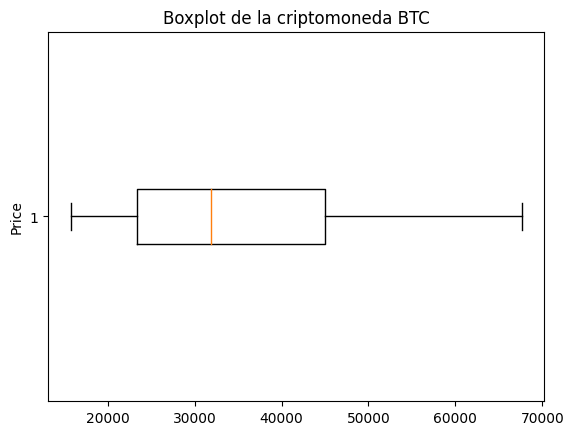

In [18]:
# Defino funcion al igual que antes, pero en este caso de boxplot para poder ver outliers de las monedas


def funcion_boxplot(moneda):
    # Filtro de dataframe 
    df_mon = df[df["Moneda"] == moneda]
    df_mon = df_mon[df_mon["date_column"]>"2021-01-01"]
    # Ploteo el caja bigote horizontalmente que se me hace mas visual
    plt.boxplot(df_mon["Price"], vert = False)
    # Seteo titulos y eje
    plt.title(f"Boxplot de la criptomoneda {moneda}")
    plt.ylabel('Price')
    plt.show()

funcion_boxplot("BTC")

La funcion desarrollada de Boxplot para la visualizacion de outliers, la filtre con registros mayores a 2021, luego del segundo boom de crecimiento del mercado de criptomonedas, en donde, considero que es un periodo mas "estable" de tiempo y mas realista con el contexto del mercado de hoy en dia. Las criptomonedas aumentaron su valor exponencialmente en 2021, luego tuvieron una caida en su precio, pero estableciendose en un valor mayor al que acarreaban. Es por eso que el foco se hace posterior a 2021.

No se ven registros outliers, aunque en un mercado tan volatil como el de las criptomonedas y la fluctuacion tan fuerte del precio, no me sorprenderia la deteccion de outliers a los cuales no los trataria ya que los considero valores que deben estar presentes en el informe sin ser tratados.



## ETH - Ethereum

Ethereum es una red que se forma para construir aplicaciones y organizaciones, tener activos y poder hacer transacciones comunicandose sin ser controlada por una autoridad central. Ethereum tiene su propia criptomoneda llamada Ether, que es utilizada para pagar ciertas actividades en la red de Ethereum.

Ethereum (ETH) es una plataforma y criptomoneda descentralizada creada por el Ruso Vitalik Buterin en 2015. A diferencia de Bitcoin, que se diseñó principalmente como una moneda digital, Ethereum se concibió como una plataforma que permite a los desarrolladores construir y ejecutar aplicaciones descentralizadas (DApps) y contratos inteligentes en su blockchain. 

A continuación, se detallan algunas características clave de Ethereum:

- Plataforma de Contratos Inteligentes: Ethereum introdujo el concepto de contratos inteligentes, que son programas autoejecutables que se ejecutan cuando se cumplen ciertas condiciones predefinidas. Estos contratos pueden ser utilizados para automatizar y gestionar acuerdos, transacciones y acciones en la cadena de bloques.

- Turing Completo: Ethereum es considerada una plataforma "Turing completa", lo que significa que su lenguaje de programación permite la creación de una amplia gama de aplicaciones y contratos inteligentes complejos. Esto le da a los desarrolladores una mayor flexibilidad en comparación con plataformas más limitadas.

- Ether (ETH): Ether es la criptomoneda nativa de la red Ethereum. Además de ser utilizada como medio de intercambio, Ether se utiliza para pagar tarifas por las transacciones y ejecución de contratos inteligentes en la red.

- Decentralized Autonomous Organizations (DAOs): Ethereum también permitió la creación de DAOs (Organizaciones Autónomas Descentralizadas), que son organizaciones autónomas gobernadas por reglas y contratos inteligentes en la cadena de bloques. Los participantes pueden votar y tomar decisiones sobre el destino de la DAO.

- Actualizaciones y Mejoras: Ethereum ha experimentado varias fases de desarrollo y actualizaciones importantes. Ethereum 2.0, también conocido como Ethereum Serenity, es una actualización en curso que busca mejorar la escalabilidad, seguridad y sostenibilidad de la red mediante la adopción de la prueba de participación (Proof of Stake, PoS) en lugar de la prueba de trabajo.

- Aplicaciones Descentralizadas (DApps): Ethereum ha sido fundamental para el auge de las aplicaciones descentralizadas. DApps son aplicaciones que operan en la cadena de bloques Ethereum y pueden abarcar una variedad de industrias, como finanzas, juegos, identidad digital y más.

- Ecosistema Vibrante: Ethereum ha dado lugar a un ecosistema diverso y en constante crecimiento de proyectos, protocolos y startups que aprovechan su plataforma para innovar en diversas áreas.


In [19]:
# Replico mismo proceso por moneda pero ahora con ETH para poder analizar el caso.

df_eth = df[df["Moneda"]== "ETH"]
df_eth.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
2422,322,30823742534,691815366,309,329,307,321,ETH,2017-11-09
2423,301,28824163917,650505791,321,325,295,299,ETH,2017-11-10
2424,316,30256030132,618676054,299,319,298,315,ETH,2017-11-11
2425,314,30062176933,1172943695,315,319,299,308,ETH,2017-11-12
2426,315,30181430682,783366134,307,328,307,317,ETH,2017-11-13


In [20]:
df_eth.describe()

# Primera vista a modo resumen de los datos. Los maximos y promedios, nos dan una nocion de lo que es la moneda

,Price,Market_cap,Volume_x,Open,High,Low,Close
count,2114,2114,2114,2114,2114,2114,2114
mean,1200,139858175899,12934485736,1199,1235,1160,1200
std,1141,136619921118,12886476067,1139,1172,1101,1138
min,84,8696897486,5911434,84,85,83,84
25%,225,23817781679,4750735044,225,230,219,225
50%,714,72314525522,9627566924,719,748,686,720
75%,1843,220945359947,16935645731,1844,1874,1808,1844
max,4815,571665766496,140906534191,4810,4892,4718,4812


In [21]:
evolucion_precio("ETH")

El grafico sigue un cierto patron al igual que bitcoin en el sentido de que la moneda, si bien tiene fuertes fluctuaciones y es un mercado con mucho movimiento, su tendencia a largo plazo es alcista y se puede ver en los finales de 2022 y en el 2023 como la moneda se estabilizo un poco mas en cuanto a precio pero su piso esta situado por encima de los 1200 USD, lo que casi iguala el pico que tuvo previa a esa caida en enero de 2018 de 1448 USD.

El precio de Ethereum (ETH) y otras criptomonedas experimentó una caída significativa en 2018 después del auge de finales de 2017. Hay varios factores que contribuyeron a esta caída:

- Sobrecalentamiento del mercado: A finales de 2017, el mercado de criptomonedas experimentó un rápido aumento de precios en general, con aumentos astronómicos en el valor de muchas monedas, incluido Ethereum. Este rápido aumento de precios llevó a una burbuja especulativa, donde los inversores estaban comprando principalmente por el temor de perderse, en lugar de evaluar los fundamentos subyacentes.

- Regulación y medidas gubernamentales: A medida que las criptomonedas ganaron popularidad, los gobiernos de varios países comenzaron a prestar más atención a la regulación y supervisión de este mercado. Las declaraciones de reguladores y funcionarios gubernamentales en diferentes partes del mundo crearon incertidumbre y preocupación entre los inversores. Las medidas regulatorias y las prohibiciones en algunos países afectaron la confianza en el mercado.

- Problemas técnicos y escalabilidad: Ethereum estaba en proceso de realizar actualizaciones técnicas para mejorar su escalabilidad y rendimiento. Estas actualizaciones, como la transición de Proof of Work (PoW) a Proof of Stake (PoS) y la implementación de Ethereum 2.0, generaron preocupaciones sobre la viabilidad técnica y la posibilidad de interrupciones en la red.

- ICOs y proyectos dudosos: Durante el auge de 2017, muchas Initial Coin Offerings (ICOs) se llevaron a cabo en la plataforma Ethereum. Sin embargo, una gran cantidad de estos proyectos resultaron ser fraudulentos o de baja calidad. A medida que se revelaron más casos de estafas y proyectos sin cumplir sus promesas, la confianza en la plataforma Ethereum y en el mercado en general se vio afectada.

- Corrección del mercado: Después de un rápido aumento de precios, es común que los mercados experimenten correcciones significativas. La burbuja especulativa en 2017 llevó a una corrección inevitable en 2018, donde los precios de muchas criptomonedas, incluido Ethereum, retrocedieron a niveles más realistas y fundamentados.

- Es importante señalar que los mercados de criptomonedas son volátiles y están influenciados por una variedad de factores económicos, tecnológicos y psicológicos. La caída del precio de Ethereum en 2018 fue el resultado de la interacción de múltiples factores, y las opiniones pueden variar sobre cuál fue el factor más influyente.

A partir de mediados del 2020, se ve una tendencia alcista del precio debido a una combinación de factores fundamentales, tecnológicos y macroeconómicos. Aquí hay algunas razones clave que contribuyeron al aumento del precio de Ethereum durante ese período:

- DeFi (Finanzas Descentralizadas): A partir de mediados de 2020, el ecosistema DeFi en Ethereum ganó una gran tracción. Los protocolos de préstamos, intercambios descentralizados, staking y otros servicios financieros construidos sobre la cadena de bloques de Ethereum comenzaron a experimentar un crecimiento exponencial. Esto aumentó la demanda de Ethereum, ya que muchas de estas plataformas requieren ETH para operar.

- Tokens no fungibles (NFTs): Los NFTs, que son representaciones digitales únicas de activos tangibles e intangibles, también contribuyeron al aumento de la demanda de Ethereum. Los NFTs se utilizaron en áreas como el arte digital, colecciones digitales, entretenimiento y más. Muchos de estos proyectos se basan en la cadena de bloques de Ethereum y requieren ETH para participar.

- Ethereum 2.0 y mejora de la escalabilidad: A lo largo de 2020 y 2021, Ethereum continuó trabajando en la implementación de Ethereum 2.0, que es una actualización que busca abordar los problemas de escalabilidad y mejorar la eficiencia de la red. Esta actualización incluye la transición de Ethereum de un sistema de consenso basado en Proof of Work (PoW) a Proof of Stake (PoS), lo que debería mejorar la eficiencia energética y permitir que más transacciones se procesen en la red.

- Interés institucional: Al igual que Bitcoin, Ethereum también atrajo la atención de inversores institucionales y empresas. A medida que las instituciones financieras comenzaron a considerar las criptomonedas como parte de su cartera de inversiones, Ethereum, con su enfoque en contratos inteligentes y aplicaciones descentralizadas, se convirtió en una opción atractiva.

- Estímulos económicos y política monetaria: En medio de la pandemia de COVID-19, muchos gobiernos y bancos centrales implementaron políticas de estímulo económico que incluían la impresión de dinero. Esto generó preocupaciones sobre la inflación y llevó a algunos inversores a buscar refugio en activos alternativos, como las criptomonedas, incluido Ethereum.

- FOMO y psicología del mercado: El "miedo a perderse" (FOMO) es un fenómeno común en los mercados de criptomonedas. Cuando el precio de Ethereum comenzó a aumentar, más inversores se sintieron motivados a comprar para no quedarse atrás en un mercado en alza. Esto puede alimentar un ciclo de aumento de precios a medida que más personas compran para aprovechar las ganancias potenciales.




In [22]:
grafico_de_velas("ethereum")

En este grafico de velas, acotado al ultimo año, se puede ver como se va elevando el piso de precio de la moneda. Con su alta volatilidad, en donde se ven caidas rojas estrepitosas y aumentos de precio abruptos pero en menor medida. Es decir, el riesgo a simple vista en el Ether parece ser mayor en cuanto a las caidas, pero en cuanto a las alzas de mercado parecen ser mas pero en menor proporcion a lo que son las bajas dentro de esta criptomoneda

In [23]:
market_cap_tiempo("ETH")

El market cap de la segunda moneda mas popular, y segunda en Market cap es menos de la mitad de lo que es el Bitcoin, mientras que el pico de capitalizacion de BTC es 1.28T, en el pico de Ethereum se puede ver un pico de 571 Billones de capitalizacion de mercado.

Tambien es una moneda, que si bien ya esta establecida en el mercado, y fue lanzada en 2015 tiene mucho movimiento de dinero y en el caso de esta moneda como ya fue descripto los usuarios no solo lo usan como un instrumento de trading, si no que tambien se utiliza demasiado por sus funcionalidades.

In [24]:
riesgo_cripto("ETH")



Desviación estándar de los precios: 909.03
Coeficiente de variación de los precios: 40.74%


A lo largo de los años comprendidos en este dataset, y tras lo ya expuesto, se nota que ETH posee un poco mas de riesgo con respecto al bitcoin, ya que su coeficiente de variacion es mayor. Se visualiza este efecto en los cambios abruptos que tiene ETH con altas subidas de precio y altas caidas, en comparacion con lo que es Bitcoin.

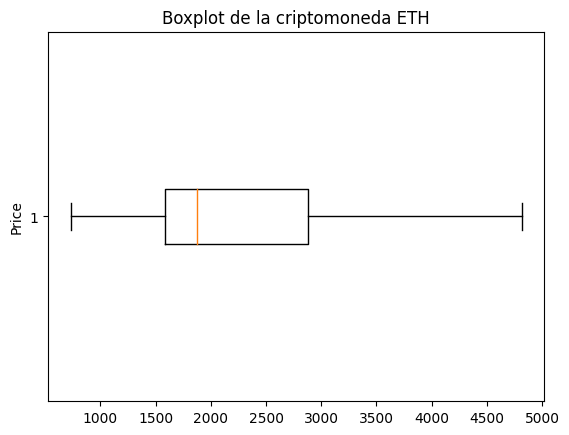

In [25]:
funcion_boxplot("ETH")

No se ven registros outliers, con respecto al precio de Ethereum.

## BNB - BINANCE COIN

Binance Coin, es la moneda que pertenece y fue creada por la actual sitio de Exchange mas grande y con mas movimientos de criptomonedas.

Sería muy difícil hablar de los origenes de BNB “Binance Coin”, sin contar la historia de Binance exchange. Binance Coin debutó en julio de 2017 con una oferta inicial de monedas (ICO). Como parte de la ICO, los tokens BNB se distribuyeron a diferentes partes, incluidos los inversores ángeles y el equipo fundador de Binance.

BNB fue un token ERC-20 producido en la red Ethereum durante su ICO y sus primeros días. Binance lanzó su plataforma de trading de criptomonedas apenas unos días después de que concluyera su ICO de mediados de 2017.

Después, Binance estableció su propia blockchain nativa, Binance Chain, en 2019. (BC). BC introdujo la moneda BNB nativa de la blockchain. En 2019, los usuarios obtuvieron la nueva moneda BNB a cambio de sus tokens BNB ERC-20 a través de un intercambio de tokens.

Binance gasta una parte de sus ingresos cada trimestre para recomprar y quemar Binance Coins, destruyéndolos. Binance ha estado haciendo quemas trimestrales desde 2017.

Binance continuará quemando tokens BNB cada trimestre hasta que haya adquirido y destruido 100 millones de monedas Binance, o la mitad de su suministro total. El método reduce la oferta de Binance Coin y repercute en su escases, lo que puede afectar al valor del activo.

Binance también tiene un programa llamado BNB Pioneer Burn Program, que evalúa los casos en los que los titulares de BNB han perdido BNB de forma irrecuperable y les devuelve el importe restándolo de la siguiente quema de BNB.

El uso de Binance Coin está aumentando al mismo tiempo que la expansión de Binance. El activo comenzó como un medio de recaudar dinero para el exchange de Binance. Tras su creación en 2017, Binance ganó rápidamente tracción como exchange de criptodivisas. Bajo el paraguas de la marca Binance, Binance pasó de ser una plataforma de trading y comercio de criptomonedas a ser más bien un ecosistema.

Binance ha desarrollado una DEX, dos blockchains, una opción de comercio de criptomonedas peer-to-peer (P2P), una opción de préstamo de criptomonedas, y más a lo largo de los años. BNB se ha expandido junto con Binance.

Las monedas BNB pueden utilizarse para pagar transacciones en el exchange de Binance. La moneda BNB se ha empleado previamente para reducir los costos en este exchange de criptomonedas, con los consumidores pagando tarifas más baratas al mantener BNB y pagar las tarifas de la plataforma en BNB. 

In [26]:
df_bnb = df[df["Moneda"]== "BNB"]
df_bnb.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
4536,2,201460232,11367250,2,2,2,2,BNB,2017-11-09
4537,2,178919972,7770039,2,2,2,2,BNB,2017-11-10
4538,2,167488453,5531034,2,2,2,2,BNB,2017-11-11
4539,2,150991374,9288921,2,2,1,2,BNB,2017-11-12
4540,2,165744855,6612122,2,2,2,2,BNB,2017-11-13


In [27]:
df_bnb.describe()

# Primera vista a modo resumen de los datos. Los maximos y promedios, nos dan una nocion de lo que es la moneda

,Price,Market_cap,Volume_x,Open,High,Low,Close
count,2114,2114,2114,2114,2114,2114,2114
mean,163,25922071615,917982020,162,167,157,162
std,178,29071323575,1538435159,178,184,172,178
min,2,149961271,67,2,2,1,2
25%,15,2147643208,149607607,15,16,15,15
50%,30,4504628377,373158887,30,31,29,30
75%,306,48507639556,1123120580,305,312,297,305
max,675,110441230385,22103516568,676,691,635,676


In [28]:
evolucion_precio("BNB")

El precio de esta criptomoneda tal y como fue descripto en su presentacion, fue lanzada a madiados de 2017 y al principio su valor era menor al lanzarse al mercado en donde su oferta inicial fue la siguiente: 

- 40% u 80 millones de las monedas BNB fueron distribuidas para el equipo de fundadores.

- 10% u 20 millones de las monedas BNB fueron distribuidas para los inversores ángeles.

- 50% u 100 millones de las monedas BNB fueron distribuidas para subasta publica.

Luego en 2019, tras el lanzamiento de la Binance Chain se ve un incremento en el precio por condiciones y expectativas del mercado por el crecimiento y aumento de la popularidad de la Exchange

El crecimiento exponencial de Binance Coin (BNB) en febrero de 2021 estuvo impulsado por varios factores clave que se alinearon para aumentar la demanda y la adopción de la criptomoneda. Aquí están algunas de las razones principales que contribuyeron a este rápido crecimiento:

- Lanzamiento de Binance Smart Chain (BSC): A principios de 2021, Binance lanzó Binance Smart Chain (BSC), una cadena de bloques paralela a Binance Chain. BSC ofrecía transacciones más rápidas y tarifas más bajas en comparación con Ethereum, lo que atrajo a desarrolladores y usuarios a la plataforma. BNB desempeñó un papel esencial en BSC como moneda para pagar tarifas y participar en la red.

- DeFi en BSC: La rápida adopción de BSC como plataforma para aplicaciones de finanzas descentralizadas (DeFi) atrajo una gran cantidad de usuarios y proyectos. Los proyectos DeFi que migraron a BSC, junto con la capacidad de BSC para facilitar transacciones económicas, generaron una demanda significativa de BNB para usarlo en diversas actividades DeFi.

- PancakeSwap y agricultura de rendimiento: PancakeSwap, un intercambio descentralizado (DEX) en BSC, ganó popularidad como alternativa a los DEX basados en Ethereum. PancakeSwap introdujo la agricultura de rendimiento y la minería de liquidez, lo que permitía a los usuarios apostar BNB y otros tokens para obtener recompensas. La perspectiva de altos rendimientos atrajo a muchos usuarios a BNB y al ecosistema BSC.

- Quema de tokens y escasez: Binance realiza regularmente quemas de tokens BNB, en las cuales una cierta cantidad de BNB se quema (se retira de la circulación). Esta práctica ayuda a reducir la oferta de BNB con el tiempo, lo que puede aumentar la percepción de escasez y, potencialmente, elevar el precio.

- Dominio de Binance: Binance es una de las mayores y más influyentes casas de cambio de criptomonedas del mundo. La reputación de Binance y su base de usuarios sólida hacen que BNB sea atractivo para operar e invertir. Los desarrollos positivos y los anuncios por parte de Binance pueden tener un impacto significativo en el precio de BNB.

- Sentimiento alcista general del mercado: El mercado general de criptomonedas estaba en una fase alcista a principios de 2021, con un aumento en el interés de inversores minoristas e institucionales. Este sentimiento alcista del mercado probablemente contribuyó al aumento del precio de BNB y otras criptomonedas.

LUego del aumento exponencial en Febrero 2021, se ve una intensa fluctuacion del precio de esta moneda. La volatilidad es una característica inherente de los mercados de criptomonedas y puede ser influenciada por una variedad de factores. Aquí hay algunas razones que podrían haber contribuido a la fluctuación del precio de BNB después de ese período de crecimiento:

- Corrección del mercado: Después de un rápido aumento en el precio, es común que los mercados experimenten correcciones. Los inversores que obtuvieron ganancias durante el crecimiento exponencial podrían haber decidido vender parte de sus posiciones, lo que podría haber llevado a una disminución en el precio.

- Sentimiento del mercado: Los eventos externos, las noticias y los comentarios de figuras influyentes en el espacio de las criptomonedas pueden influir en el sentimiento del mercado. Las reacciones a eventos positivos o negativos pueden causar movimientos abruptos en el precio.

- Ciclos de mercado: Los ciclos de mercado en el espacio de las criptomonedas son comunes. Después de un período de aumento, es posible que se produzca una fase de consolidación o incluso una fase de declive antes de que el mercado vuelva a subir.

-Competencia y cambios en el ecosistema: La competencia en el espacio de las criptomonedas es intensa. Cambios en el ecosistema, como la aparición de nuevas plataformas DeFi o intercambios, podrían afectar la demanda de BSC y, por lo tanto, influir en el precio de BNB.













In [29]:
grafico_de_velas('binancecoin')

A diferencia de las monedas anteriores (BTC y ETH), se nota que esta moneda tuvo mucho mas perdidas que las anteriores, lo que si se puede notar es que cuando el mercado esta en alza tiene grandes rendimientos, pero cuando esta a la baja su valor cae en menor proporcion. Con lo cual, en este ultimo año que muestra el grafico, para los traders con buena vision puede ser una gran forma de obtener grandes rendimientos en poco tiempo, pero eso conlleva un riesgo logicamente.

In [30]:
market_cap_tiempo("BNB")

Tras su lanzamiento en 2017 y crecimiento posterior, su volumen de mercado fue creciendo asociado a su precio manteniendo un capitalizacion de mercado de entre 1 a 5 Billones de USD hasta su crecimiento exponencial en Febrero de 2021 previamente explicado, llegando a un tope aproximado de capitalizacion de unos 110 Billones de dolares.

In [31]:
riesgo_cripto("BNB")

Desviación estándar de los precios: 120.21
Coeficiente de variación de los precios: 35.82%


Esta moneda a diferencia de las anteriores siempre mantuvo precios menores, y su volatilidad y coeficiente de variacion al ser alto mantiene su condicion de muy volatil. Sin embargo, en el periodo analizado por esta funcion, o sea posterior a 2021, su riesgo es menor a las vistas anteriormente.

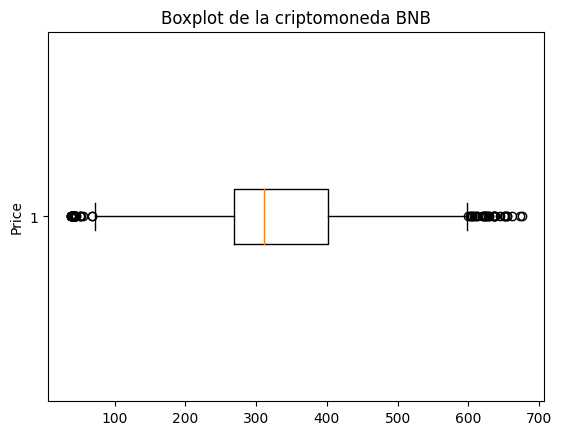

In [32]:
funcion_boxplot("BNB")

En el caso de BNB, se ven varios registros outliers post 2021. Esto se puede deber a la formula del calculo, ya que considera los valores muy pequeños que tuvo esta moneda a principios de 2021 menores a 60 dolares, y que luego tambien considera los valores de pico de las moneda de hasta unos 675 dolares.

Como bien he mencionado anteriormente, no considero apropiado hacer un tratamiento de outliers ya que al ser un mercado tan volatil no lo considero pertinente

## USDT - TETHER

Tether (USDT) es una criptomoneda estable, también conocida como stablecoin, que está diseñada para mantener un valor estable en relación con una moneda fiduciaria, generalmente el dólar estadounidense (USD). A diferencia de muchas otras criptomonedas que pueden ser volátiles en términos de precios, Tether se crea con la intención de proporcionar estabilidad y fungibilidad similares a las monedas tradicionales. Algunas características clave de Tether son:

- Respaldado por Reservas: Tether se presenta como una moneda digital respaldada por reservas en moneda fiduciaria, como dólares estadounidenses en cuentas bancarias. Se dice que cada unidad de Tether emitida está respaldada por una unidad equivalente de la moneda fiduciaria.

- Estabilidad de Precio: La idea principal detrás de Tether es mantener su valor estable en relación con la moneda fiduciaria de referencia. Por ejemplo, un Tether debería tener aproximadamente el mismo valor que un dólar estadounidense.

- Uso en Trading y Exchanges: Tether se utiliza ampliamente en el espacio de las criptomonedas como una forma de refugio para los traders y usuarios que desean mantener su valor en momentos de volatilidad. También es utilizado por traders en muchas plataformas de intercambio para mover dinero rápidamente entre criptomonedas.

- Distintas Versiones: Tether se ha emitido en varias cadenas de bloques diferentes, incluyendo Bitcoin (como Tether en la cadena de bloques Omni), Ethereum (como Tether en la cadena de bloques ERC-20) y otras cadenas. Cada versión representa Tether en una cadena específica.

- Críticas y Auditorías: Tether ha sido objeto de controversia en el pasado debido a la preocupación sobre si realmente tiene suficientes reservas para respaldar todas las unidades emitidas. La compañía detrás de Tether, Tether Limited, ha declarado que está respaldada por reservas, pero no ha completado auditorías públicas para demostrar esto de manera concluyente.



In [33]:
df_usdt = df[df["Moneda"]== "USDT"]
df_usdt.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
6650,1,537388871,364325000,1,1,1,1,USDT,2017-11-09
6651,1,565364649,750882000,1,1,1,1,USDT,2017-11-10
6652,1,597346828,754936000,1,1,1,1,USDT,2017-11-11
6653,1,598321089,1444590000,1,1,1,1,USDT,2017-11-12
6654,1,599946433,773200000,1,1,1,1,USDT,2017-11-13


In [34]:
df_usdt.describe()

# En este caso el metodo describe no es muy util, pero muestra y refleja la estabilidad de la moneda y los maximos de capitalizacion de mercado

# Se ve su estabilidad y no movimeinto en cuanto a precios

,Price,Market_cap,Volume_x,Open,High,Low,Close
count,2113,2113,2113,2113,2113,2113,2113
mean,1,33815242480,39094374378,1,1,1,1
std,0,32940428606,44584694850,0,0,0,0
min,1,537388871,573,1,1,1,1
25%,1,2773726365,13098215454,1,1,1,1
50%,1,15559126338,32926083271,1,1,1,1
75%,1,68032463505,53408344753,1,1,1,1
max,1,83895071912,926767674515,1,1,1,1


In [35]:
evolucion_precio("USDT")

Tether (USDT) se creó en noviembre de 2014. Fue uno de los primeros ejemplos de stablecoins en el mercado de criptomonedas. USDT es una stablecoin respaldada por dólares estadounidenses en una proporción de 1:1, lo que significa que se supone que cada token USDT está respaldado por una reserva equivalente de dólares estadounidenses mantenidos en custodia por la empresa emisora, Tether Limited.

En este caso se puede ver la estabilidad de la moneda, el grafico puede verse un poco "volatil", pero es porque la escala es tan infima que los pequeños movimientos propios del mercado se ven mas marcados de lo que realmente son. 

Las stablecoins son un tipo de criptomoneda diseñada para mantener un valor estable en comparación con una referencia, como una moneda fiduciaria (como el dólar estadounidense) o una cesta de activos. Estas monedas se crearon para abordar la volatilidad extrema que a menudo se observa en otras criptomonedas, como Bitcoin y Ethereum. Las stablecoins tienen varios propósitos y usos en el ecosistema de las criptomonedas y más allá. Aquí te explico las razones detrás de su creación y su función:

Razones para la creación de stablecoins:

- Mitigación de la volatilidad: La principal razón para crear stablecoins es ofrecer una alternativa más estable a las criptomonedas tradicionales que experimentan fluctuaciones de precios significativas en un corto período de tiempo. Esto hace que las stablecoins sean más adecuadas para su uso en transacciones diarias, comercio y otros casos donde la estabilidad de valor es esencial.

- Facilitación de transacciones: Las stablecoins pueden utilizarse para realizar transacciones de valor sin preocuparse por la volatilidad. Los comerciantes y las empresas pueden aceptar stablecoins como pago sin el riesgo de que su valor cambie dramáticamente antes de que puedan convertirse en moneda fiduciaria.

- Inversión y ahorro: Las stablecoins también pueden utilizarse como una forma de proteger el valor de los activos en un entorno criptográfico sin tener que retirarse completamente del mundo de las criptomonedas. Los usuarios pueden almacenar sus activos en forma de stablecoins cuando anticipan una disminución en el valor de otras criptomonedas.

- Acceso a la financiación descentralizada (DeFi): Muchos protocolos y aplicaciones en el ecosistema DeFi utilizan stablecoins como moneda base para préstamos, intercambios y otros servicios financieros. Al tener una moneda estable, los usuarios pueden evitar la volatilidad en sus transacciones.

In [36]:
market_cap_tiempo("USDT")

Tether o USDT es la cuarta moneda en cuanto a capitalizacion de mercado, al ser estable su crecimiento es lineal con respecto al precio y a la oferta de moneda, es decir que es cuasi un 1 a 1 con respecto al dolar y al crecimiento. Con lo cual, es decir que la capitalizacion aumenta a medida que se inyecta plata en esta moneda, ya que la misma es respaldad por un dolar, es decir que al ingresar mas dolares, mas monedas son emitidas lo que lleva a un crecimiento del mercado y su capitalizacion.

Con respecto al crecimiento y el alza que se ve desde el 2020 y crecio exponencialmente los años posteriores, ya que es una forma de acceso a un activo estable el cual es util para proteger ahorros y mantener la estabilidad del dinero de los inversores. Con el inicio de la pandemia, tambien fue un medio digital y descentralizado mas facil para poder acceder a esta moneda y proteger ahorros frente a una situacion de tanta incretidumbre. A su vez, tambien influye el boom y las adopciones de las criptomonedas.

In [37]:
riesgo_cripto("USDT")

Desviación estándar de los precios: 0.00
Coeficiente de variación de los precios: 0.20%


No esta de mas, que si bien ya fue expuesto la poca volatilidad y escaso riesgo que tienen las stablecoins, su coeficiente de variacion asi lo refleja.

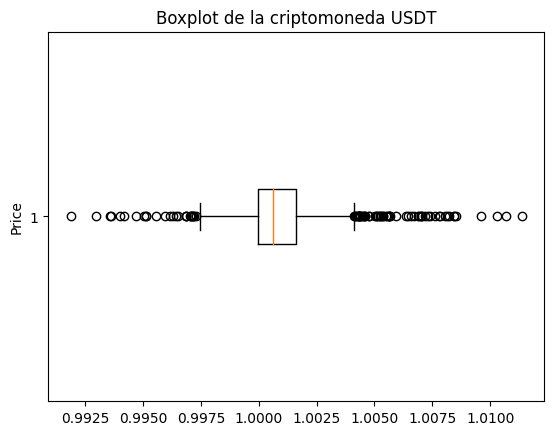

In [38]:
funcion_boxplot("USDT")

En este caso, podemos ver outliers en USDT, pero debido a que la gran mayoria de los registros con los que contamos estan con valor 1 o muy cercanos al mismo. Es por eso que si ponemos atencion al rango intercuartil, su minimo esta seteado muy proximo en valor a su maximo, menor a 1 y por ello todos los registros que caen por fuera de este infimo rango son considerados outliers.

## TRX - TRON

TRON (TRX) es una plataforma blockchain descentralizada que tiene como objetivo crear un ecosistema para la descentralización de contenido y aplicaciones en la web. Fue fundada por Justin Sun en 2017 con el objetivo de revolucionar la forma en que se comparte y consume contenido en línea. TRON se centra en la industria del entretenimiento y la creación de contenido digital. 

A continuación, se detallan algunas características clave de TRON:

- Descentralización del Entretenimiento: TRON se propone descentralizar la industria del entretenimiento, permitiendo a los creadores de contenido distribuir sus obras directamente a los usuarios sin intermediarios. Esto incluye música, videos, juegos y más.
- Smart Contracts y DApps: TRON es compatible con la ejecución de contratos inteligentes y el desarrollo de aplicaciones descentralizadas (DApps). Los desarrolladores pueden crear DApps que funcionan en la cadena de bloques TRON y aprovechar su infraestructura.
- Economía de TRX: TRX es la criptomoneda nativa de la red TRON. Se utiliza para pagar tarifas de transacción en la red y también se puede utilizar para incentivar a los creadores de contenido y desarrolladores de DApps.
- Adquisiciones y Colaboraciones: TRON ha adquirido o colaborado con varias compañías en la industria del entretenimiento y tecnología, como BitTorrent, lo que le ha ayudado a expandir su alcance y su ecosistema.
- Velocidad y Escalabilidad: TRON se ha centrado en mejorar la velocidad y la escalabilidad de su cadena de bloques para permitir una mayor cantidad de transacciones por segundo y una experiencia más fluida para los usuarios.
- Planes de Desarrollo a Largo Plazo: TRON ha presentado varios planes de desarrollo a largo plazo, como la migración a su propia cadena de bloques independiente y la implementación de mejoras técnicas y funcionales en su plataforma.
- Comunidad Activa: TRON tiene una comunidad activa de usuarios, desarrolladores y creadores de contenido que se involucran en su ecosistema y participan en el desarrollo de la plataforma.

En resumen, TRON es una plataforma blockchain que busca descentralizar la industria del entretenimiento y la creación de contenido digital. Con un enfoque en contratos inteligentes y aplicaciones descentralizadas, TRON aspira a cambiar la forma en que los usuarios interactúan con el contenido en línea y a empoderar a los creadores de contenido directamente.


In [39]:
df_trx = df[df["Moneda"]== "TRX"]
df_trx.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
8763,0,156404162,1224287,0,0,0,0,TRX,2017-11-09
8764,0,133968506,990423,0,0,0,0,TRX,2017-11-10
8765,0,125470649,707643,0,0,0,0,TRX,2017-11-11
8766,0,118235246,814789,0,0,0,0,TRX,2017-11-12
8767,0,132386427,894986,0,0,0,0,TRX,2017-11-13


In [40]:
df_trx.describe()

# El metodo describe en este caso no da informacion certera, solo nos puede dar un indicio de lo que es el market cap y el volumen
# ya que el resto de las variables ligadas al peso al ser muy cercano al 0 no se visualiza bien

,Price,Market_cap,Volume_x,Open,High,Low,Close
count,2114,2114,2114,2114,2114,2114,2114
mean,0,3797536261,920386832,0,0,0,0
std,0,2552930172,1068495136,0,0,0,0
min,0,118235246,16493,0,0,0,0
25%,0,1494812052,274401494,0,0,0,0
50%,0,2807868560,657391226,0,0,0,0
75%,0,6118433276,1206728230,0,0,0,0
max,0,15232064950,13018731030,0,0,0,0


In [41]:
evolucion_precio("TRX")

Tron fue lanzada en Noviembre de 2017 y la moneda fue recibida y aceptada por el mercado positivamente, lo que elevo el precio a 0.23 centavos de dolar, alcanzado su maximo historico (al menos hasta la fecha) en enero de 2018, luego al igual que la mayoria de las criptomonedas experimento fluctuaciones marcadas, pero manteniendo un precio mas relativo que las anteriores monedas. En gran medida, se debe a que el precio es bajo y se habla de centavos de dolar.

El precio de TRON (TRX) experimentó un crecimiento significativo en sus inicios debido a varios factores que generaron interés y demanda en el mercado. Aquí hay algunas razones clave que contribuyeron al rápido aumento de precio de TRX en sus primeras etapas:

- Fundador prominente y marketing efectivo: Justin Sun, el fundador de TRON, es un individuo con una presencia destacada en el mundo de las criptomonedas. Utilizó su red y su visibilidad para promover TRON y atraer la atención de inversores y entusiastas.

- Visión ambiciosa: TRON presentó una visión ambiciosa de crear un ecosistema de contenido y entretenimiento descentralizado. La promesa de una plataforma que permitiera a los creadores de contenido interactuar directamente con los usuarios y obtener recompensas en forma de criptomonedas atrajo a inversores que veían un gran potencial en esta idea.

- Partnerships y colaboraciones: TRON anunció asociaciones y colaboraciones con varios proyectos y plataformas, lo que aumentó su visibilidad y atrajo la atención de la comunidad criptográfica. Estas asociaciones generaron expectativas sobre el futuro éxito y adopción de TRON.

- ICO (Initial Coin Offering) exitosa: TRON realizó una exitosa ICO en septiembre de 2017, recaudando fondos para el desarrollo de la plataforma. Durante este período, hubo un aumento en la demanda de TRX a medida que los inversores compraban tokens para participar en la ICO.

- Mercado alcista general: En 2017, el mercado de criptomonedas experimentó un mercado alcista generalizado, lo que resultó en aumentos de precios en muchas monedas digitales. TRON se benefició de este impulso alcista junto con otros proyectos.


Luego tuvo su caida esperada en el precio, estableciendose por debajo de los 5 centavos hasta 2021. Y luego su piso se elevo entre 5 y 10 centavos. 







In [42]:
grafico_de_velas('tron')

Enfocando en el ultimo año, podemos ver grandes movimientos pero son engañosos ya que se mueven unos pocos centavos. 
Pero este grafico, es util para poder ver el precio del ultimo año seteado por encima de esos 5 centavos que mencione anteriormente. 

In [43]:
market_cap_tiempo("TRX")

Acompañado por su evolucion de precio visto anteriormente, vemos que la emision de trx fueron muchas monedas, contemplando que el pico de capitalizacion esta por encima de los 15 billones a un precio de 0.23. Con lo cual, me resulto llamativo la cantidad de oferta de TRX que tiene esta criptomoneda.

In [44]:
riesgo_cripto("TRX")

Desviación estándar de los precios: 0.02
Coeficiente de variación de los precios: 28.24%


El riesgo de TRX vemos que es menor, por el hecho de que su coeficiente de variacion es un porcentaje menor a los casos que veniamos viendo y a su vez por que su desviacion estandar es pequeña, ya que la moneda maneja valores muy cercanos al 0. 

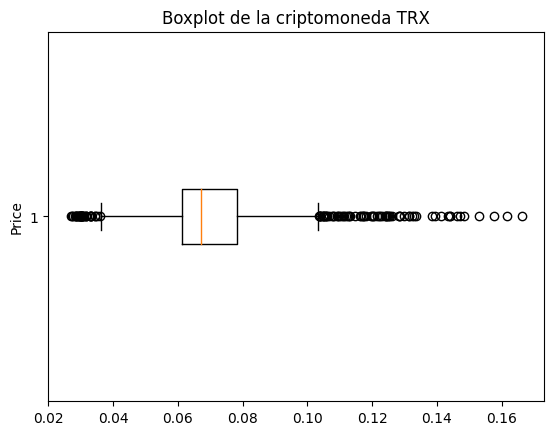

In [45]:
funcion_boxplot("TRX")

Caso similar al de USDT, donde al tener varios valores que son los mas representativos y repetidos a traves de su historia dentro de su rango intercuartil, hace que el mismo sea acotado y al ser un mercado tan volatil, que si bien sufre de tanta volatilidad, luego la tendencia de la moneda queda en alza respecto de periodos anteriores y es por ello que se ven varios registros sobre todo por encima y debajo de los bigotes del boxplot.

## USDC - USD Coin

USD Coin (USDC) es una criptomoneda estable o stablecoin respaldada por el dólar estadounidense. Fue lanzada en 2018 como una colaboración entre Circle, una empresa financiera, y Coinbase, una plataforma de intercambio de criptomonedas. El objetivo principal de USDC es proporcionar una moneda digital que mantenga una paridad cercana al dólar estadounidense y que sea útil para transacciones y contratos inteligentes en el espacio de las criptomonedas. La criptomoneda USDC es una Stablecoin o moneda estable al igual que USDT, por lo cual son similares en cuanto a sus caracteristicas.

Algunas características clave de USD Coin son:
- Respaldado por Reservas en Dólares: USD Coin se presenta como una criptomoneda estable respaldada por reservas en dólares estadounidenses mantenidas en cuentas bancarias. Cada unidad de USDC emitida se supone que está respaldada por una unidad equivalente de dólar.
- Estabilidad de Precio: USD Coin se mantiene con una paridad cercana de 1:1 con el dólar estadounidense. Esto significa que 1 USDC se supone que tiene un valor cercano a 1 dólar.
- Uso en Transacciones y Contratos Inteligentes: USDC se utiliza como una forma de moneda digital para realizar transacciones en el espacio de las criptomonedas. También puede ser utilizado en contratos inteligentes para facilitar acuerdos financieros y comerciales en la cadena de bloques.
- Amplia Adopción: USD Coin ha ganado tracción en el ecosistema cripto y se ha convertido en una de las criptomonedas estables más utilizadas. Se encuentra disponible en varias cadenas de bloques, incluyendo Ethereum (como token ERC-20) y otras cadenas populares.
- Auditorías y Transparencia: Los emisores de USD Coin han realizado auditorías regulares para demostrar que las reservas de dólares estadounidenses respaldan efectivamente la cantidad de USDC en circulación. Esto es un esfuerzo por garantizar la transparencia y la confianza en la moneda.
- Apoyo Regulatorio: Los emisores de USD Coin se han comprometido a cumplir con las regulaciones y estándares financieros. Esto ha ayudado a establecer relaciones con instituciones financieras y reguladores.


In [46]:
df_usdc = df[df["Moneda"]== "USDC"]
df_usdc.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
10877,1,0,47077,1,1,1,1,USDC,2018-10-08
10878,1,0,55542,1,1,1,1,USDC,2018-10-09
10879,1,0,41813,1,1,1,1,USDC,2018-10-10
10880,1,0,48789,1,1,1,1,USDC,2018-10-11
10881,1,0,101594,1,1,1,1,USDC,2018-10-12


In [47]:
evolucion_precio("USDC")

Al igual que la otra stablecoin analizada previamente, la USDC y Tether comparten las mismas caracteristicas. La diferencia que se puede ver en el grafico, es que USDC a lo largo del tiempo tuvo mucho menor variacion de precio, en donde el valor de la moneda no fluctuo mas de 7 centavos de dolar. Es decir, que el rango entre el minimo y el maximo alcanzado por la moneda tan solo tiene una diferencia de 7 centavos de dolar.

In [48]:
market_cap_tiempo("USDC")

La evolucion del market cap de USDC es similar al de USDT, el boom de las criptomonedas y la busqueda por una fuente de inversion, fuente de ahorros segura, sumado a las transacciones, acceso al mercado financiero descentralizado, entre otras, fueron grandes motivadores a ese crecimiento exponencial que se ve desde comienzos del 2021, tocando un pico de 56 Billones en Julio de 2022.

In [49]:
riesgo_cripto("USDC")

Desviación estándar de los precios: 0.00
Coeficiente de variación de los precios: 0.25%


Por supuesto que su riesgo es casi nulo por lo ya descripto.

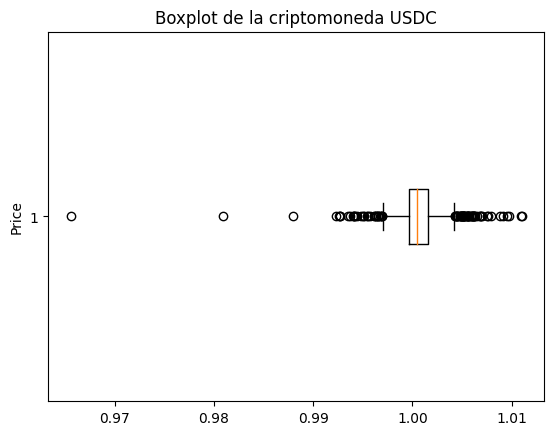

In [50]:
funcion_boxplot("USDC")

Al igual que USDT, hay outliers por su gran cantidad de registros cercanos a 1 o 1. Pero esta moneda que durante su historia tuvo menos cambios que USDT, su rango intercuartil, es mucho menor que la de esa moneda. Los valores del rango como el grafico y su escala demuestran son muchos decimales, y entre maximo y minimo, estos bigotes no tienen una diferencia mayor a 0,01 con lo cual es logico ver tantos outliers.  

## DOGE - DOGECOIN

Dogecoin es una criptomoneda que nació en 2013 como una versión paródica de Bitcoin. Aunque comenzó como una broma, Dogecoin se ha convertido en una criptomoneda popular y querida en la comunidad cripto.

Algunas características clave de Dogecoin son:

- Orígenes Lúdicos: Dogecoin se creó como una parodia de las criptomonedas serias y tenía un meme de un perro Shiba Inu como su logotipo. A pesar de su origen humorístico, ganó seguidores y se convirtió en una moneda real.

- Comunidad Activa: Dogecoin tiene una comunidad activa y amigable que a menudo se involucra en acciones benéficas y donaciones. Por ejemplo, han recaudado fondos para causas humanitarias y patrocinado equipos deportivos.

- Suministro Ilimitado: A diferencia de Bitcoin y muchas otras criptomonedas, Dogecoin no tiene un suministro máximo limitado. Inicialmente, se creó con una tasa de inflación anual del 5.256%, pero esta tasa ha disminuido con el tiempo.

- Desarrollo de la Comunidad: Aunque Dogecoin no tiene un equipo de desarrollo formal como otras criptomonedas, su código abierto permite que la comunidad participe en su desarrollo y mejora.



In [51]:
df_doge = df[df["Moneda"]== "DOGE"]
df_doge.head()


,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
12660,0,155932870,6324408,0,0,0,0,DOGE,2017-11-09
12661,0,130395488,3739400,0,0,0,0,DOGE,2017-11-10
12662,0,132340096,1929896,0,0,0,0,DOGE,2017-11-11
12663,0,117441602,2989498,0,0,0,0,DOGE,2017-11-12
12664,0,132273234,2250990,0,0,0,0,DOGE,2017-11-13


In [52]:
evolucion_precio("DOGE")

Es tan loco, tan lucrativo en algunos casos el mundo de las criptomonedas que esta moneda es un claro ejemplo, de como afectan los dichos y hechos de figuras publicas o contextos pueden modificar y afectar a un mercado como este. En el caso de Doge, el 6 de mayo de 2001, Elon Musk, CEO de Tesla, twitteo sobre esta criptomoneda y el precio crecio exponencialmente pasando de los 0.01 centavos que venia accarreando a tocar su pico en 0.68 centavos, lo cual revoluciono el mercado de este activo.

En tan solo unos meses, el valor aumento un 680%, una inmensidad por el hecho de un tweet en donde nombra la moneda.


In [53]:
market_cap_tiempo("DOGE")

Mas loco aun, que lo ya expuesto anteriormente, es la cantidad de capitalizacion de mercado que habia en esos dias. De estar casi siempre en la linea promedio de los 370 Millones de dolares, en ese dia, el mercado exploto junto a su precio, llevandolo a una capitalizacion de casi 89 Billones de dolares, un incremento exponencial muy marcado a la alza. 

De las monedas que vimos es la que tuvo el salto mas grande, con lo cual, la gente que invirtio en el momento justo fue la que pudo hacerse millonaria de la noche a la mañana.

In [54]:
riesgo_cripto("DOGE")

Desviación estándar de los precios: 0.10
Coeficiente de variación de los precios: 74.25%


Asi tambien como fue una de las monedas que pudo haber traido mas lucro, tambien es de las monedas con mas riesgo, ya que su volatilidad y coeficiente de variacion post accion del tweet de Elon Musk vario mucho e hizo que el mercado tenga esos movimientos abruptos, lo cual puede lidear a dos extremos, una inmensa ganancia o una enorme perdida.

Aqui aplica muy bien el dicho financiero que a mayor ganancia, mayor riesgo. 

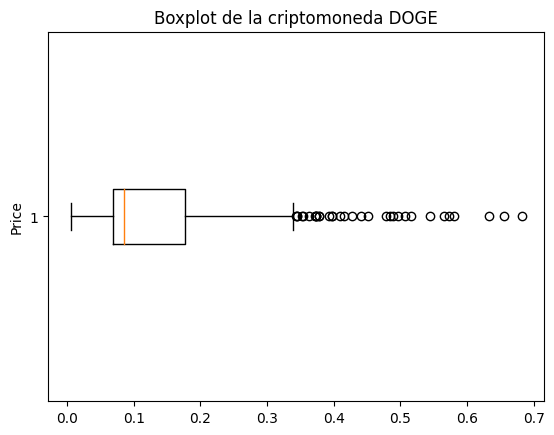

In [55]:
funcion_boxplot("DOGE")

Mismo caso que las monedas anteriores con valores muy pequeños. Se detectan outliers por su volatilidad en algun momento y por su mayoria de registros dentro de ese ramgo intercuartil

## ADA - CARDANO

Cardano (ADA) es una plataforma de blockchain y una criptomoneda que se centra en la investigación y la ingeniería de alto nivel para crear una red escalable y segura. Fue fundada en 2015 por un equipo liderado por Charles Hoskinson, quien también fue uno de los cofundadores de Ethereum. 

Algunas características clave de Cardano son:

- Enfoque en la Investigación: Cardano se basa en investigaciones científicas y revisión académica para diseñar su protocolo. El equipo se esfuerza por incorporar mejoras y avances tecnológicos respaldados por evidencia.

- Prueba de Participación: Cardano utiliza un algoritmo de consenso llamado Ouroboros, que es un protocolo de prueba de participación (Proof of Stake, PoS). Esto reduce el consumo energético en comparación con la minería de prueba de trabajo y puede mejorar la escalabilidad.

- Capas Separadas: Cardano se estructura en capas separadas, que permiten una mayor modularidad y facilitan las actualizaciones sin afectar la funcionalidad principal.

- Contratos Inteligentes: Cardano implementó gradualmente contratos inteligentes a través de su actualización "Alonzo". Esto permite a los desarrolladores crear aplicaciones descentralizadas (DApps) y ejecutar contratos automatizados en la cadena de bloques.

- Interoperabilidad y Sostenibilidad: Cardano busca abordar la interoperabilidad entre cadenas de bloques y promover la sostenibilidad a largo plazo. Su enfoque en la gobernanza y la adaptabilidad tiene como objetivo mejorar la evolución continua del protocolo.

- Ecosistema y Adopción: Cardano ha establecido una comunidad y un ecosistema activos, con proyectos en desarrollo y colaboración con diversas industrias, incluidas finanzas y educación.

Cardano es una plataforma blockchain que busca combinar investigación académica rigurosa con ingeniería práctica para crear una cadena de bloques segura, escalable y eficiente. Su enfoque en la prueba de participación, los contratos inteligentes y la sostenibilidad lo convierten en un proyecto destacado en el espacio de las criptomonedas y la tecnología blockchain.

Otra de los objetivos de Cardano es contribuir a la evolución de la web hacia lo que se conoce como "Web 3.0". La Web 3.0 es una visión de Internet que va más allá de la Web 2.0 actual al enfocarse en la descentralización, la seguridad y la interoperabilidad, entre otros aspectos. A diferencia de la Web 2.0, que se caracteriza por la centralización de plataformas y datos, la Web 3.0 busca crear un ecosistema más descentralizado y empoderar a los usuarios para que tengan más control sobre sus datos y transacciones en línea.



In [56]:
df_ada = df[df["Moneda"]== "ADA"]
df_ada.head()

,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
14774,0,849617010,20628140,0,0,0,0,ADA,2017-11-09
14775,0,707628644,6563684,0,0,0,0,ADA,2017-11-10
14776,0,712956035,5632138,0,0,0,0,ADA,2017-11-11
14777,0,635774573,7550745,0,0,0,0,ADA,2017-11-12
14778,0,651139901,4284486,0,0,0,0,ADA,2017-11-13


In [57]:
evolucion_precio("ADA")

Hubieron varios hechos los cuales pudieron afectar al crecimiento del precio, hasta llegar a su pico a Cardano en 2021, algunos de ellos son:

- Lanzamiento de Actualizaciones y Protocolo Alonzo: Durante 2021, Cardano estaba trabajando en la implementación de su protocolo Alonzo, que permite la funcionalidad de contratos inteligentes en la red. Este evento fue muy esperado, ya que permitiría el desarrollo de aplicaciones descentralizadas (dApps) en la plataforma Cardano, lo que podría haber generado un aumento en el interés y la demanda.

- Mayor Adopción y Uso: A medida que Cardano avanzaba en su desarrollo y mejoraba su red, más proyectos y desarrolladores podrían haber mostrado interés en construir sobre la plataforma. El aumento en la adopción y el uso real en aplicaciones descentralizadas podría haber impulsado el precio.

- Interés Institucional: La creciente adopción de criptomonedas por parte de instituciones financieras y grandes inversores podría haber llevado a un mayor interés en Cardano como una de las opciones de inversión disponibles en el mercado.

- Crecimiento General del Mercado: Durante 2021, el mercado de criptomonedas en general experimentó un aumento significativo en los precios de muchas criptomonedas. Es posible que Cardano haya sido parte de este crecimiento general.


Luego de ese pico, la moneda se establecio en un precio mucho menor al del pico, pero al igual que la mayoria de las criptomonedas no estables, sigue el patron de tener estos ciclos volatiles pero seteando su piso a un nivel mayor al que tenia anteriormente.

In [58]:
market_cap_tiempo("ADA")

La capitalizacion de mercado de Cardano es inmensa y como lo mostraba su grafico de precio, la capitalizacion sigue su misma tendencia. Con un pico alcanzado en Septiembre 2021 de aproximadamente 95 Billones de dolares, creciendo aproximadamente 32 veces vs año anterior, una crecida exponencial, que tal y como vimos con el precio luego cayo. 

Pero su piso de capitalizacion anterior al alza del 2021, rondaba los 2 Billones de dolares, ahora se encuentra en aproximadamente unos 10 Billones, quintuplicando su piso de capitalizacion.

In [59]:
riesgo_cripto("ADA")

Desviación estándar de los precios: 0.65
Coeficiente de variación de los precios: 72.27%


Moneda con mucha volatilidad, al igual que dogecoin pero con un poco menor de riesgo

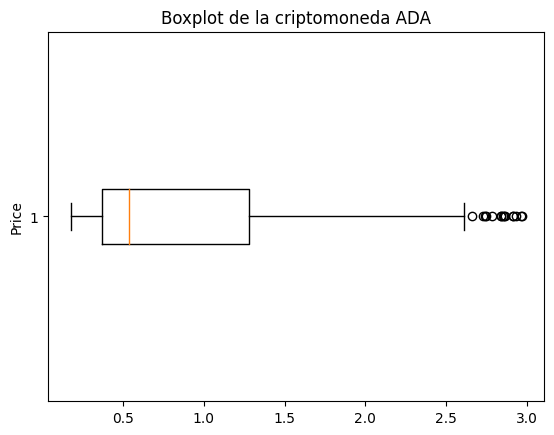

In [60]:
funcion_boxplot("ADA")

Cardano tambien demuestra outliers, pero en este caso en menor cantidad de casos que son outliers en donde el grafico de la evolucion de precios se puede ver el pico y el momento en que se ocasionan estos outliers, en esos valores extremos que ha supido tener esta moneda.

## SOL - SOLANA

Solana es una plataforma blockchain de alto rendimiento diseñada para proporcionar escalabilidad y velocidad en la ejecución de aplicaciones descentralizadas (DApps) y contratos inteligentes. Fue lanzada en 2020 por Anatoly Yakovenko y su equipo con el objetivo de abordar los desafíos de escalabilidad que enfrentan algunas cadenas de bloques más antiguas. 

A continuación, se detallan algunas características clave de Solana:

- Enfoque en la Escalabilidad: Una de las características más destacadas de Solana es su enfoque en la escalabilidad. Utiliza un enfoque único llamado "Proof of History" (Prueba de Historia) para aumentar la capacidad de procesamiento y reducir los tiempos de confirmación de transacciones.

- Consenso Híbrido: Solana combina varios algoritmos de consenso, como "Proof of Stake" (Prueba de Participación) y "Proof of History", para lograr un alto rendimiento y velocidad de transacción. Este enfoque híbrido busca mejorar tanto la seguridad como la escalabilidad.

- Rendimiento y Velocidad: Solana está diseñada para manejar un gran número de transacciones por segundo (TPS), lo que la convierte en una de las cadenas de bloques más rápidas. Esto permite una experiencia fluida para los usuarios y reduce las congestiones en la red.

- Smart Contracts y DApps: Solana es compatible con la ejecución de contratos inteligentes y el desarrollo de aplicaciones descentralizadas. Los desarrolladores pueden aprovechar su infraestructura para crear soluciones rápidas y escalables.

- Solana Token (SOL): SOL es la criptomoneda nativa de la red Solana. Se utiliza para pagar tarifas de transacción, participar en la gobernanza y como staking para participar en la seguridad de la red.

- Adaptabilidad y Desarrollo Continuo: Solana se caracteriza por su enfoque en la adaptabilidad y la mejora continua. El equipo está comprometido con el desarrollo técnico y la evolución de la plataforma para cumplir con las necesidades cambiantes del espacio cripto.

En resumen, Solana es una plataforma blockchain que busca resolver los problemas de escalabilidad y velocidad al utilizar tecnologías innovadoras como Proof of History y un enfoque híbrido de consenso. Su objetivo es proporcionar una infraestructura rápida y eficiente para el desarrollo de aplicaciones descentralizadas y contratos inteligentes en una variedad de sectores.


In [61]:
df_sol = df[df["Moneda"]== "SOL"]
df_sol.head()


,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
16888,1,7827652,92672667,1,1,1,1,SOL,2020-04-11
16889,1,6173608,49458693,1,1,1,1,SOL,2020-04-12
16890,1,7269680,37821010,1,1,1,1,SOL,2020-04-13
16891,1,6302364,19579215,1,1,1,1,SOL,2020-04-14
16892,1,5306221,17523533,1,1,1,1,SOL,2020-04-15


In [62]:
evolucion_precio("SOL")

Tras el lanzamiento, la moneda fue haciendose conocida por los propositos expuestos y es por ello que su valor crecio exponencialmente como la mayoria de las criptomonedas en 2021, luego del pico en Noviembre alcanzando los 259 dolares,cayo abruptamente a 82 dolares en marzo de 2022. Luego de julio 2022, el precio de Solana comienza a estabilizarce y mantenerse mas constante entre los 20 y 40 dolares.

In [63]:
market_cap_tiempo("SOL")

Muy parecio al grafico de precio, en 2021 tuvo su gran crecimiento hasta lograr su pico en Noviembre tras alcanzar los 77 Billones de dolares. El piso de capitalizacion previo al crecimiento exponencial, se situaba aproximadamente cerca del billon de dolares, ese mismo piso luego de las fluctuaciones de fines de 2021 y principios de 2022, se establecio en un  nuevo piso que rondan los 8,70 Billones de dolares

In [64]:
riesgo_cripto("SOL")

Desviación estándar de los precios: 57.84
Coeficiente de variación de los precios: 100.78%


Solana es la moneda con mas coeficiente variacion y riesgo, de las elegidas. La funcion de riesgo, que considera 2021 hasta la actualidad tiene una gran variabilidad de precio, partiendo de 1,52 dolares el 1 de Enero de 2021, pasando por el pico alcanzado en Noviembre 2021 tocando los 259 dolares y luego quedandose en su piso de unos aproximados 30 dolares por token.

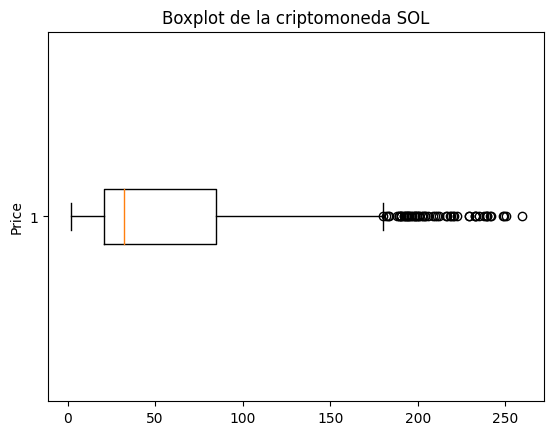

In [65]:
funcion_boxplot("SOL")

Tambien Solana muestra outliers y varios registros debido de que venia en precios menores a 50 dolares, previo a su incremento alcista experimentado y que luego de su caida volvio a mantener valores cercanos a los 50 dolares por un largo tiempo.

## XRP - RIPPLE

XRP es una criptomoneda creada por la empresa Ripple Labs en 2012. Aunque a menudo se la llama "XRP", el nombre del activo digital es "XRP". XRP es parte de una plataforma y red de pago que busca facilitar transferencias de dinero rápidas y eficientes a nivel global. A diferencia de muchas otras criptomonedas, XRP no se basa en tecnología blockchain descentralizada, sino que utiliza un enfoque diferente llamado Red de Validación Ripple (RippleNet). 

Aquí hay algunas características clave de XRP:

- RippleNet y XRP Ledger: RippleNet es la red de pago y plataforma desarrollada por Ripple Labs. Utiliza una tecnología llamada XRP Ledger, que es un libro de contabilidad distribuido y descentralizado. Sin embargo, se diferencia de las cadenas de bloques típicas en varios aspectos.

- Rapidez y Eficiencia en las Transacciones: Uno de los objetivos principales de XRP y RippleNet es proporcionar transacciones internacionales rápidas y de bajo costo. La tecnología detrás de XRP permite que las transacciones se procesen en segundos y a un costo mucho menor que los sistemas tradicionales.

- Uso en Remesas y Pagos Transfronterizos: Ripple se ha asociado con varias instituciones financieras y bancos para facilitar pagos y transferencias transfronterizas. El objetivo es reducir la fricción y el tiempo en estas transacciones, lo que puede ser especialmente útil para remesas internacionales.

- Propiedad Centralizada: A diferencia de muchas criptomonedas descentralizadas, la gran mayoría de los XRP en circulación están en manos de Ripple Labs. Esto ha sido objeto de controversia y discusión en la comunidad cripto.

En resumen, XRP es una criptomoneda creada por Ripple Labs que se utiliza en la plataforma RippleNet para facilitar pagos y transferencias internacionales rápidas y eficientes. Aunque es diferente de las criptomonedas descentralizadas tradicionales en términos de tecnología y enfoque, ha sido una parte importante del ecosistema cripto y ha buscado mejorar la infraestructura financiera global.








In [66]:
df_xrp = df[df["Moneda"]== "XRP"]
df_xrp.head()


,Price,Market_cap,Volume_x,Open,High,Low,Close,Moneda,date_column
18120,0,8377488661,147850000,0,0,0,0,XRP,2017-11-09
18121,0,7944702416,140712000,0,0,0,0,XRP,2017-11-10
18122,0,8096131364,137105000,0,0,0,0,XRP,2017-11-11
18123,0,7567632776,243874000,0,0,0,0,XRP,2017-11-12
18124,0,7865702051,133388000,0,0,0,0,XRP,2017-11-13


In [67]:
evolucion_precio("XRP")

Motivos por los cuales pudo haber crecido el precio a principio de 2018, se debe a :
- Boom de las criptomonedas

- Participación en Medios y Anuncios de Asociaciones: Las noticias y los anuncios sobre XRP y Ripple (la empresa detrás de XRP) pueden haber influido en el sentimiento del mercado. Los anuncios de asociaciones estratégicas con instituciones financieras o empresas pueden haber generado un mayor interés y demanda de XRP.

- Expansión de Ripple: Ripple, la empresa detrás de XRP, buscó activamente aumentar la adopción de su tecnología en el sector financiero. Los esfuerzos para trabajar con bancos y otras instituciones financieras podrían haber influido positivamente en el precio de XRP.

Luego sufre unas bajas y eleva su piso de precio al igual que la mayoria de las criptomonedas elegidas.

A diferencia del resto de las criptomonedas, esta misma toca su techo anteriormente que las demas y su piso luego de las demas monedas.







In [68]:
market_cap_tiempo("XRP")

Acompañando al precio, el pico alcanzado por XRP es 131 Billones de dolares.

In [69]:
riesgo_cripto("XRP")

Desviación estándar de los precios: 0.30
Coeficiente de variación de los precios: 47.58%


Un coeficiente de variacion alto, pero que como el grafico nos muestra se ve muy sesgado y marcado por las grandes volatilidades que tuvo la moneda en 2021, ya que luego se establece en un rango mas estable e incluso se ve una tendencia en alza.

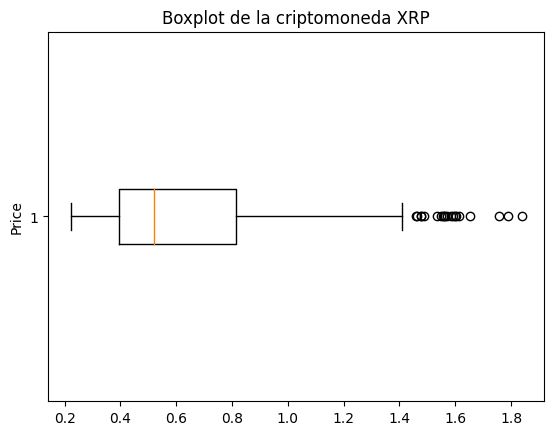

In [70]:
funcion_boxplot("XRP")

XRP presenta outliers al igual que las monedas con valores muy chicos en cuanto a su precio.

---------------------------------------------------------------------------------------------------------------------

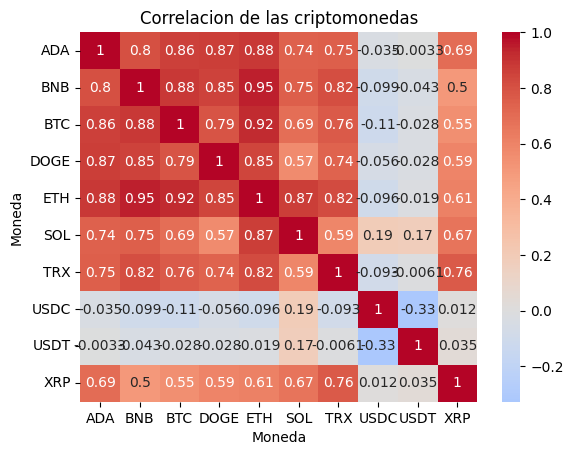

In [71]:
# Miro la correlacion que tienen los precios de las monedas

criptos = df.pivot_table(index='date_column', columns='Moneda', values='Price')

correlation_matrix = criptos.corr()

#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlacion de las criptomonedas')
plt.show()

La correlacion entre el precio de las variables nos ayuda a asociar estos riesgos y cambios volatiles entre las criptomonedas. En cierta forma, permite encontrar los pares y las monedas que mas tienen en comun entre si, como el caso de BTC Y ETH.

Por otro lado, tambien se puede ver como las Stable Coins son muy diferentes al resto de las monedas.

<Figure size 1200x800 with 0 Axes>

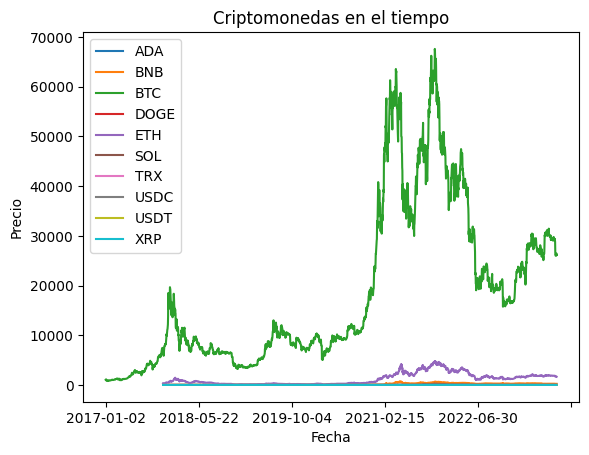

In [72]:
# Grafico de la evolucion de todas las monedas juntas

plt.figure(figsize=(12, 8))
criptos.plot.line()
plt.title('Criptomonedas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

En este grafico y tal como analizamos anteriormente, se puede ver el primer gran crecimiento que tuvieron las criptomonedas en 2017, de la mano de la precursora, el Bitcoin. Y por otro lado, si bien Bitcoin es la criptomoneda mas popular y la que mayor precio tiene en este caso, se nota el incremento que todas las monedas tuvieron en el segundo gran crecimiento exponencial de las criptomonedas en 2021. Y como luego, a finales del 2021 empiezan a caer los precios de todas las monedas pero a un precio ubicado entre la mitad del pico y de lo que eran antes de esa corriente alcista.


<Figure size 1200x800 with 0 Axes>

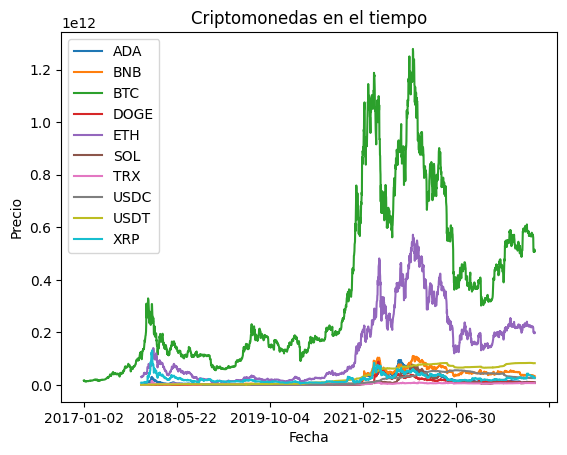

In [73]:
criptos_mk = df.pivot_table(index='date_column', columns='Moneda', values='Market_cap')
plt.figure(figsize=(12, 8))
criptos_mk.plot.line()
plt.title('Criptomonedas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

Se ve marcada la tendencia que estuvimos viendo anteriormente, con el primer boom de las criptomonedas por el 2017, y se ve claramente el incremento masivo de inversionistas en el 2021, lo que llevo a elevar el precio de todas las criptomonedas en su conjunto. Lo cual por supuesto va acompañado de una capitalizacion de mercado inmensa.

Los movimientos de precios en los mercados de criptomonedas son complejos y multifacéticos. Puede ser difícil atribuir una sola causa a una fluctuación específica, es por eso que pueden haber varios factores que pueden afectar el precio de alguno de estos activos financieros, sin embargo, vemos la tendencia del mercado de las criptomonedas por las analizadas a tener un crecimiento a lo largo de los años. 

Anteriormente y al visualizar los inicios de los precios y capitalizaciones de mercado de cada moneda, hasta alcanzar sus picos y sus pisos, se nota que a largo plazo la tendencia es alcista. Luego de estas volatilidades de mercado, se puede ver en todas las criptomonedas pudieron setear ese piso mas alto.
